## Projet jeu Python

In [1]:
# Importation de toutes les librairies
import random
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# Création de la classe pour créer le jeu du Morpion

class GameMorpion:
    
    # Inialisation du jeu
    def __init__(self, type_player, verbose = True):
        # Création de mon quadrillage pour jouer
        self.grid = [['*', '*', '*'],['*', '*', '*'],['*', '*', '*']]
        # Initialisation de la réponse de mon Joueur 1
        self.answer_player_1 = 'O'
        # Initialisation de la réponse de mon Joueur 2
        self.answer_player_2 = 'X'
        # Tous les anciens choix des utilisateurs
        self.already_answer = []
        # Pour ne pas qu'il y est de texte, ni notre grillage qui s'affiche
        self.verbose = verbose
        # Type de joueur :
        self.type_player = type_player
        # Tous les anciens choix des X
        self.already_answer_de_croix = []
        # Tous les anciens choix des O
        self.already_answer_de_rond = []
        # Score victoire
        self.score = 0
   


    def to_create_name_player(self):
        # Input qui permet de nommer le joueur 1
        self.player_1 = input("Nom du Joueur 1: ")
        # Input qui permet de nommer le joueur 1
        self.player_2 = input("Nom du Joueur 2: ")
    
        
        
    # Affichage du quadrillage
    def display_grid(self, verbose=True):
        
        # Création des séparateurs entre les différentes listes
        for first in range(3):
            for second in range(3):
                if self.verbose:
                    print('|', end = '')
                    print(self.grid[first][second], end = '')
            if self.verbose:
                print('|')
     
   

    # Création IA Dumb:
    def ia_dumb(self, value, verbose = True):
        
        k = [1, 2, 3]
        # L'IA joue choisit le numéro de ligne
        x = random.choice(k)
        
        # L'IA joue choisi le numéro de colonne colonne
        y = random.choice(k)
        
        # Si l'IA dumb joue quelque chose qui a déjà été joué on lui redemande
        while [x, y] in self.already_answer:
            x = random.choice(k)
            y = random.choice(k)
        
        self.already_answer.append([x, y])
        
        # Inscription des coordonnées de l'indicateur du joueur sur le quadrillage 
        self.grid[x - 1][y - 1] = value
        
    
    
    # Création IA Smart:
    def ia_smart(self, value, verbose = True):
               
        k = [1, 2, 3]
        
        # Vérifier si l'IA smart peut gagner ce tour là
        for x in k : #les coordonnées pour vérifier si la case fait gagner l'IA
            for y in k : #idem
                if [x,y] not in self.already_answer : #si la case n'a pas encore été jouée
                    self.grid[x-1][y-1] = value #l'IA peut y mettre son symbole
                    if self.verification(value) == value : #vérifie si cette case fait gagner l'IA
                        self.already_answer.append([x, y]) #l'IA laisse le symbole et mets dans already_answer
                        return #return pour sortir de la fonction
                    self.grid[x-1][y-1] = '*' #dans le cas où cette case ne fait pas gagner l'IA. Il faut retirer le symbole qui a été mis avant pour tester une autre case (*) pour montrer qu'une case est vide
        
        # Si l'IA SMART est le premier joueur
        if value == 'O':
            for x in k : #si on n'a trouvé aucune ligne qui nous fait gagner, on continue ici... pour vérifier que l'humain ne va pas gagner
                for y in k :
                    if [x,y] not in self.already_answer :
                        self.grid[x-1][y-1] = self.answer_player_2 #Mettre le symbole de l'humain (O) dans une case vide
                        if self.verification(self.answer_player_2) == self.answer_player_2 : #on verifie s'il n'y a pas une case qui fait gagner l'humain au tour suivant
                            self.grid[x-1][y-1] = value #si l'humain gagne, on met la croix à la place du rond
                            self.already_answer.append([x, y]) #on dit qu'on a joué la case
                            return
                        self.grid[x-1][y-1] = '*' #dans le cas où cette case ne fait pas gagner l'humain, on remplace le rond par l'étoile
        
        # Si l'IA SMART est le deuxième joueur
        elif value == 'X':
            for x in k : #si on n'a trouvé aucune ligne qui nous fait gagner, on continue ici... pour vérifier que l'humain ne va pas gagner
                for y in k :
                    if [x,y] not in self.already_answer :
                        self.grid[x-1][y-1] = self.answer_player_1 #Mettre le symbole de l'humain (O) dans une case vide
                        if self.verification(self.answer_player_1) == self.answer_player_1 : #on verifie s'il n'y a pas une case qui fait gagner l'humain au tour suivant
                            self.grid[x-1][y-1] = value #si l'humain gagne, on met la croix à la place du rond
                            self.already_answer.append([x, y]) #on dit qu'on a joué la case
                            return
                        self.grid[x-1][y-1] = '*' #dans le cas où cette case ne fait pas gagner l'humain, on remplace le rond par l'étoile

        if [2,2] not in self.already_answer : #si la case du centre n'est pas restée vide, l'IA y met son X
            self.grid[1][1] = value
            self.already_answer.append([2, 2])
            return
        
        #l'IA check les coins. Si les coins sont vides, l'IA y met son pion au hasard
        if [1,1] not in self.already_answer or [1,3] not in self.already_answer or [3,1] not in self.already_answer or [3,3] not in self.already_answer :
            
            x = random.choice([1,3])
            y = random.choice([1,3])
            
            while [x, y] in self.already_answer:
                x = random.choice([1,3])
                y = random.choice([1,3])
            
            self.grid[x-1][y-1] = value
            self.already_answer.append([x, y])
            return
        
        #l'IA met son pion au hasard
        x = random.choice(k)
        y = random.choice(k)
        
        while [x, y] in self.already_answer:
            x = random.choice(k)
            y = random.choice(k)
        
        self.already_answer.append([x, y])
        self.grid[x-1][y-1] = value
    
    # Demande au joueur de jouer 
    def to_play_game(self, value, verbose = True):
        
        # Input pour le numéro de ligne du placement du joueur
        x = int(input("Entrer le numéro de la ligne (entre 1 et 3) "))
        
        # Oblige le joueur à rentrer une valeur entre 1 et 3 pour le numéro de ligne
        while x not in [1, 2, 3]:
            if self.verbose:
                print('\n')
                print("Vous devez ABSOLUMENT entrer une valeur entre 1 et 3")
                x = int(input("Entrer le numéro de la ligne (entre 1 et 3) "))
        
        # Input pour le numéro de colonne du placement du joueur
        y = int(input("Entrer le numéro de colonne (entre 1 et 3) "))
        
        # Oblige le joueur à rentrer une valeur entre 1 et 3 pour le numéro de colonne
        while y not in [1, 2, 3]:
            if self.verbose:
                print('\n')
                print("Vous devez ABSOLUMENT entrer une valeur entre 1 et 3")
                y = int(input("Entrer le numéro de colonne (entre 1 et 3) "))
        
        ''' 
            Permet de créer un décallage pour que le joueur n'ait pas à placer une valeur entre 0 et 2
            ce qui ne serait pas intuitif pour ce dernier
        '''
        
        while [x, y] in self.already_answer:
            if self.verbose:
                print('\n')
                print('La case est déjà prise, veuillez en choisir une autre.')
                x = int(input("Entrer le numéro de la ligne (entre 1 et 3) "))
                y = int(input("Entrer le numéro de colonne (entre 1 et 3) "))
        
        self.already_answer.append([x, y])
        self.already_answer_de_rond.append([x, y])
         
        
        x = x - 1
        y = y - 1
        
        # Inscription des coordonnées de l'indicateur du joueur sur le quadrillage 
        self.grid[x][y] = value
        
        
        
    # Vérification si un joueur gagne et si la partie est finie (avec toutes les cases utilisées)        
    def verification(self, value):
        
        # Vérifie le joueur courant n'a pas aligné son signe sur une ligne
        for first in range(3):
            count = 0
            for second in range(3):
                if self.grid[first][second] == value:
                    count += 1
            # Si il a aligné son signe 3 fois en horizontal
            if count == 3:
                # Le joueur est déclaré vainqueur  et donc retourné par la fonction
                return value

        # Vérifie le joueur courant n'a pas aligné son signe sur une colonne
        for first in range(3):
            count = 0
            for second in range(3):
                if self.grid[second][first] == value:
                    count += 1
            # Si il a aligné son signe 3 fois en vertical
            if count == 3:
                # le joueur est déclaré vainqueur  et donc retourné par la fonction
                return value
        # Test de diagonales 1
        count = 0
        for first in range(3):
            if self.grid[first][first] == value:
                    count += 1
            if count == 3:
                # le joueur est déclaré vainqueur  et donc retourné par la fonction
                return value
        count = 0
        # Test de diagonales 2
        for first in range(3):
            if self.grid[2-first][first] == value:
                    count += 1
            if count == 3:
                #le joueur est déclaré vainqueur  et donc retourné par la fonction
                return value
                
        # vérifie qu'il reste de la place sur le plateau en comptant les signes de tout les joueurs
        count = 0
        for first in range(3):
            for second in range(3):
                if( self.grid[first][second] != '*'):
                    count += 1
        # Si il n'y a plus de place sur le plateau
        if count == 9: 
            # On retourne vrai pour dire que le jeu est fini
            return True
        # Le jeu n'est pas encore fini on retourne false
        return False
    # Permet à un joueur de jouer son tour
    
    
    
    # Contient le code qui assure le bon déroulement du jeu en lui même
    
    
    
    
    def to_launch_game(self, verbose = True):
        if self.verbose:
            print('\n')
            print('Commencer le jeu')
        self.display_grid()
        
        if self.type_player == 'human':
            self.to_create_name_player()
        
        elif self.type_player == 'ia_dumb_against_human':
            # Le joueur humain qui joue
            self.player_1 = input("Nom du Joueur 1: ")
            
        elif self.type_player == 'ia_smart_against_human':
            # Le joueur humain qui joue
            self.player_1 = input("Nom du Joueur 1: ")
            
        else:
            pass
        
        # Boucle qui continue jusqu'à ce que toutes les cases soient jouées
        while True:
            
            # Partie avec Humain contre Humain
            if self.type_player == 'human':
                # Le joueur 1 Humain joue
                if self.verbose:
                    print('\n')
                    print(f"C'est au tour de {self.player_1}")
                self.to_play_game(self.answer_player_1)
                self.display_grid()
            
                # Test si le joueur 1 Humain gagne ou pas
                result_end_game = self.verification(self.answer_player_1)
            
                # Si joueur 1 Humain gagne
                if result_end_game == self.answer_player_1:
                    # Retourne le nom du joueur 1 lorsqu'il gagne
                    if self.verbose:
                        print('\n')
                        print(self.player_1 +" a gagné !" )
                    return
                elif result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("Égalité entre les joueurs")
                    return
            
                # Le joueur 2 Humain joue
                if self.verbose:
                    print('\n')
                    print(f"C'est au tour de {self.player_2}")
                self.to_play_game(self.answer_player_2)
                self.display_grid()
                
                # Test si le joueur 2 Humain gagne ou pas
                result_end_game = self.verification(self.answer_player_2)
                
                # Si joueur 2 Humain gagne
                if result_end_game != False:
                    # Retourne le nom du joueur 2 lorsqu'il gagne
                    if self.verbose:
                        print('\n')
                        print(self.player_2 +" a gagné !")
                    return
                elif result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("Égalité entre les joueurs")
                    return
             
            
            # Partie Humain contre IA DUMB
            elif self.type_player == 'ia_dumb_against_human':
                
                # Le joueur 1 Humain joue
                if self.verbose:
                    print('\n')
                    print(f"C'est au tour de {self.player_1}")
                self.to_play_game(self.answer_player_1)
                self.display_grid()
            
                # Test si le joueur gagne ou pas
                result_end_game = self.verification(self.answer_player_1)
            
                # Si joueur 1 gagne
                if result_end_game == self.answer_player_1:
                    # Retourne le nom du joueur 1 lorsqu'il gagne
                    if self.verbose:
                        print('\n')
                        print(str(self.player_1) +" a gagné !")
                    return
                elif result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("Égalité entre les joueurs")
                    return
                
                # IA dumb joue
                if self.verbose:
                    print('\n')
                    print("C'est au tour de l'IA dumb")
                self.ia_dumb(self.answer_player_2)
                self.display_grid()
                
                # Test si IA DUMB gagne ou pas
                result_end_game = self.verification(self.answer_player_2)
                
                # Si L'IA DUMB gagne
                if result_end_game == self.answer_player_2:
                    # Retourne l'IA DUMB gagne
                    if self.verbose:
                        print('\n')
                        print("L'IA dumb a gagné")
                    return
                elif result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("Égalité entre les joueurs")
                    return
                
                
                
            # Partie Humain contre IA SMART
            elif self.type_player == 'ia_smart_against_human':
                
                # Le joueur 1 Humain joue
                if self.verbose:
                    print('\n')
                    print(f"C'est au tour de {self.player_1}")
                self.to_play_game(self.answer_player_1)
                self.display_grid()
            
                # Test si le joueur gagne ou pas
                result_end_game = self.verification(self.answer_player_1)
            
                # Si joueur 1 gagne
                if result_end_game == self.answer_player_1:
                    # Retourne le nom du joueur 1 lorsqu'il gagne
                    if self.verbose:
                        print('\n')
                        print(str(self.player_1) +" a gagné !")
                    return(str(self.player_1) +" a gagné !")
                elif result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print('Égalité entre les joueurs')
                    return "Égalité entre les joueurs"
                
                # IA smart joue
                if self.verbose:
                    print('\n')
                    print("C'est au tour de l'IA smart")
                self.ia_smart(self.answer_player_2)
                self.display_grid()
                
                # Test si IA DUMB gagne ou pas
                result_end_game = self.verification(self.answer_player_2)
                
                # Si L'IA SMART gagne
                if result_end_game == self.answer_player_2:
                    # Retourne l'IA smart gagne
                    if self.verbose:
                        print('\n')
                        print("L'IA smart a gagné")
                    return "L'IA smart a gagné"
                elif result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("Égalité entre les joueurs")
                    return "Égalité entre les joueurs"
                
            # Partie IA DUMB contre IA SMART
            elif self.type_player == 'ia_dumb_against_ia_smart':
                
                
                # L'IA Dumb joue en premier
                if self.verbose:
                    print('\n')
                    print("C'est au tour de l'IA dumb")
                self.ia_dumb(self.answer_player_1)
                self.display_grid()
            
                # Test si le joueur gagne ou pas
                self.result_end_game = self.verification(self.answer_player_1)
            
                # Si l'IA DUMB gagne
                if self.result_end_game == self.answer_player_1:
                    # Retourne lorsqu'elle gagne
                    if self.verbose:
                        print('\n')
                        print("L'IA dumb a gagné")
                    return "L'IA dumb a gagné"
                elif self.result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("Égalité entre les joueurs")
                    return "Égalité entre les joueurs"
                
                # IA smart joue
                if self.verbose:
                    print('\n')
                    print("C'est au tour de l'IA smart")
                self.ia_smart(self.answer_player_2)
                self.display_grid()
                
                # Test si IA DUMB gagne ou pas
                self.result_end_game = self.verification(self.answer_player_2)
                
                # Si L'IA SMART gagne
                if self.result_end_game == self.answer_player_2:
                    # Retourne l'IA smart gagne
                    if self.verbose:
                        print('\n')
                        print("L'IA smart a gagné")
                    return "L'IA smart a gagné"
                elif self.result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("Égalité entre les joueurs")
                    return "Égalité entre les joueurs"
                
                
            # Partie IA SMART contre IA SMART
            elif self.type_player == 'ia_smart_against_ia_smart':
                
                
                # L'IA Smart joue en premier
                if self.verbose:
                    print('\n')
                    print("C'est au tour de l'IA smart 1")
                self.ia_smart(self.answer_player_1)
                self.display_grid()
            
                # Test si l'ia smart 1 gagne ou pas
                self.result_end_game = self.verification(self.answer_player_1)
            
                # Si l'IA SMART 1 gagne
                if self.result_end_game == self.answer_player_1:
                    # Retourne lorsqu'elle gagne
                    if self.verbose:
                        print('\n')
                        print("L'IA smart 1 a gagné")
                    return "L'IA smart 1 a gagné"
                elif self.result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("L'IA smart 1 a gagné")
                    return "L'IA smart 1 a gagné"
                
                # IA smart 2 joue
                if self.verbose:
                    print('\n')
                    print("C'est au tour de l'IA smart")
                self.ia_smart(self.answer_player_2)
                self.display_grid()
                
                # Test si IA SMART 2 gagne ou pas
                self.result_end_game = self.verification(self.answer_player_2)
                
                # Si L'IA SMART 2 gagne
                if self.result_end_game == self.answer_player_2:
                    # Retourne l'IA smart 2 gagne
                    if self.verbose:
                        print('\n')
                        print("L'IA smart 2 a gagné")
                    return "L'IA smart 2 a gagné"
                elif self.result_end_game == True:
                    # Sinon égalité entre les deux joueurs
                    if self.verbose:
                        print('\n')
                        print("Égalité entre les joueurs")
                    return "Égalité entre les joueurs"

## Choisir le mode de jeu

In [96]:
# Choix de la configuration
print("1 - Humain contre humain\n2 - Joueur Humain contre IA DUMB\n3 - Joueur Humain contre IA SMART\n4 - IA DUMB contre IA SMART\n5 - IA SMART contre IA SMART")
config = 0


while config < 1 or config > 6:
    config = int(input("Choisissez une configuration : "))
    
if config == 1:
    first_game = GameMorpion('human', verbose = True)
    first_game.to_launch_game()

elif config == 2:
    first_game = GameMorpion('ia_dumb_against_human', verbose = True)
    first_game.to_launch_game()

elif config == 3:
    first_game = GameMorpion('ia_smart_against_human', verbose = True)
    first_game.to_launch_game()

elif config == 4:
    first_game = GameMorpion('ia_dumb_against_ia_smart', verbose=True)
    first_game.to_launch_game()

elif config == 5:
    first_game = GameMorpion('ia_smart_against_ia_smart', verbose=True)
    first_game.to_launch_game()


1 - Humain contre humain
2 - Joueur Humain contre IA DUMB
3 - Joueur Humain contre IA SMART
4 - IA DUMB contre IA SMART
5 - IA SMART contre IA SMART
Choisissez une configuration : 5


Commencer le jeu
|*|*|*|
|*|*|*|
|*|*|*|


C'est au tour de l'IA smart 1
|*|*|*|
|*|O|*|
|*|*|*|


C'est au tour de l'IA smart
|X|*|*|
|*|O|*|
|*|*|*|


C'est au tour de l'IA smart 1
|X|*|O|
|*|O|*|
|*|*|*|


C'est au tour de l'IA smart
|X|*|O|
|*|O|*|
|X|*|*|


C'est au tour de l'IA smart 1
|X|*|O|
|O|O|*|
|X|*|*|


C'est au tour de l'IA smart
|X|*|O|
|O|O|X|
|X|*|*|


C'est au tour de l'IA smart 1
|X|*|O|
|O|O|X|
|X|*|O|


C'est au tour de l'IA smart
|X|*|O|
|O|O|X|
|X|X|O|


C'est au tour de l'IA smart 1
|X|O|O|
|O|O|X|
|X|X|O|


L'IA smart 1 a gagné


## IA SMART contre IA DUMB pour 1000 parties

In [97]:
def stats(type_de_partie, nb_de_parties): # je crée la fonction en arguments le type de parties et le nombre de parties
    win = 0 # j'initialise le score (l'ia a gagné 0 fois)
    tie = 0 # J'initialise mes matchs nuls
    lose = 0 # J'initialise mes défaites
    for nb in range(nb_de_parties):
        first_game = GameMorpion(type_de_partie, verbose = False) #j'initialise le morpion
        resultat = first_game.to_launch_game()
        if resultat == "L'IA smart a gagné":
            win +=1
        elif resultat == 'Égalité entre les joueurs':
            tie += 1
        else:
            lose += 1
            
    return win, tie, lose

ia_smart_proba = stats('ia_dumb_against_ia_smart', 1000)
print("L'IA SMART a gagné " + str(ia_smart_proba[0]) + " fois.")
print('Le nombre de matchs nuls est de '+ str(ia_smart_proba[1]) + ".")
print("L'IA SMART a perdu "+ str(ia_smart_proba[2]) + " fois.")



L'IA SMART a gagné 843 fois.
Le nombre de matchs nuls est de 145.
L'IA SMART a perdu 12 fois.


## Probabilités IA SMART pour 10 000 parties

In [98]:
ia_smart_proba = stats('ia_dumb_against_ia_smart', 10000)[0]
print("L'IA SMART a gagné " + str(ia_smart_proba) + " fois sur 10000 parties soit " + str(ia_smart_proba / 10000 * 100) + '% de taux de victoire.')

L'IA SMART a gagné 8522 fois sur 10000 parties soit 85.22% de taux de victoire.


## Pie chart - IA SMART contre IA DUMB pour 20 000 parties

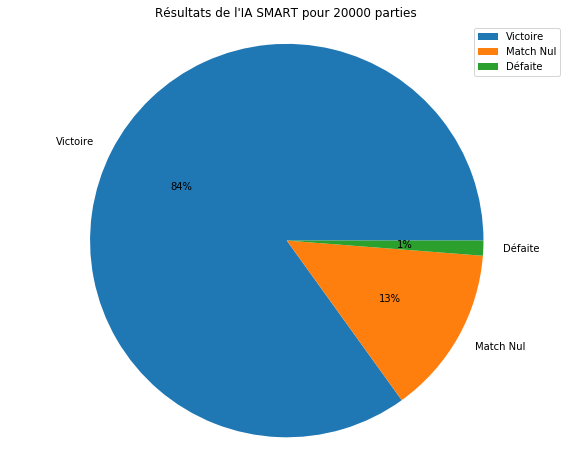

In [100]:
#On lance 20 000 parties. Voici le pie chart associée à ces 20 000 parties
ia_smart_proba = stats('ia_dumb_against_ia_smart', 20000)
labels = ['Victoire', 'Match Nul', 'Défaite']
number = [ia_smart_proba[0], ia_smart_proba[1], ia_smart_proba[2]]

plt.figure(figsize = (10, 8))
plt.pie(number, labels = labels, autopct = '%d%%')
plt.axis('equal')
plt.title("Résultats de l'IA SMART pour 20000 parties")
plt.legend(labels)
plt.show()

### Projet réalisé par Fadi EL CHEIKH TAHA, Célia GUYOBON, Kévin SAGAN et Julien RIBEIRO